# Modelo de Análise Prescitiva de Custos de Importação

##### # Importando Módulos

In [40]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

## Parte I: Importando Dados e Definindo Variáveis Iniciais

In [41]:
frete_china = pd.read_excel('dados/Frete Aéreo - China.xlsx')
frete_eua = pd.read_excel('dados/Frete Aéreo - EUA.xlsx')

In [42]:
# Custo da unidade:

custo_China = 12.10
custo_EUA = 12.90

# Dados da carga:

lote_importacao = 5000

# Unitização:

unidades_por_caixa = 25

caixa_m3 = 0.023

caixa_peso_kg = 3

# Despesas de despacho:

despacho_exp_EUA = 1000

despacho_exp_China = 1200

despacho_importação = 1100

# Transporte local:

custo_transporte_EUA_veiculo = 500

custo_transporte_China_veiculo = 600

custo_transporte_destino_veiculo = 750

# Veículo:

veiculo_m3 = 11.2

veiculo_capacidade_kg = 1500

In [43]:
#custos de frete:

#China:

frete_china

,"tabela lata ( fator de cubagem : 166,67 kg/m3)",Unnamed: 1
0,frete aéreo - peso cubado,unitário
1,"de 0,00 até 350 kg.","$ 20,00"
2,"de 350,01 até 650 kg.","$ 18,00"
3,"de 650,01 até 900 kg.","$ 16,00"
4,"de 900,01 até 1.400 kg.","$ 14,00"
5,"de 1.400,01 até 1.800 kg.","$ 12,00"
6,acima de 1.800 kg.,"$ 9,50"


In [44]:
#EUA:

frete_eua

,"tabela lata ( fator de cubagem : 166,67 kg/m3)",Unnamed: 1
0,frete aéreo - peso cubado,unitário
1,"de 0,00 até 350 kg.","$ 12,00"
2,"de 350,01 até 650 kg.","$ 10,00"
3,"de 650,01 até 900 kg.","$ 8,00"
4,"de 900,01 até 1.400 kg.","$ 7,00"
5,"de 1.400,01 até 1.800 kg.","$ 6,00"
6,acima de 1.800 kg.,"$ 5,00"


In [45]:
# Custo de desembarque do caminhão:

custo_desembarque_caminhao = 80

# Custo dos terminais:

custo_terminal_EUA_m3 = 100
custo_terminal_China_m3 = 90
# custo_terminal_Destino = CIP * 0.01

# Custo do seguro internacional:

# seguro = CPT * 0.05

# Tributos:

# impostos = CPT * 0.55

In [46]:
numero_caixas = lote_importacao / unidades_por_caixa
print("O número total de caixas é {}.".format(numero_caixas))

O número total de caixas é 200.0.


In [47]:
m3_total_caixas = numero_caixas * caixa_m3
print("O total de m3 das caixas é {}.".format(m3_total_caixas))

O total de m3 das caixas é 4.6.


In [48]:
peso_total_caixas = caixa_peso_kg * numero_caixas
print("O peso total das caixas é {} kg.".format(peso_total_caixas))

O peso total das caixas é 600.0 kg.


In [49]:
taxa_utilizacao_caminhao = ((m3_total_caixas / veiculo_m3) + (peso_total_caixas / veiculo_capacidade_kg)) / 2
print("Como estamos utilizando {}% da capacidade do caminhão, será necessário {} caminhão(ões).".format(100 * (round(taxa_utilizacao_caminhao, 4)), (1 if taxa_utilizacao_caminhao < 1 else math.ceil(taxa_utilizacao_caminhao))))

Como estamos utilizando 40.54% da capacidade do caminhão, será necessário 1 caminhão(ões).


## Parte II: Calculando Custos

### Calculando Importação da China

#### FCA:

In [50]:
custos_total_mecadoria = lote_importacao * custo_China
custos_total_mecadoria

60500.0

In [51]:
custos_total_terminal = m3_total_caixas * custo_terminal_China_m3
custos_total_terminal

413.99999999999994

In [52]:
FCA_Custo_Total_China = custos_total_mecadoria + custo_transporte_China_veiculo + custos_total_terminal + despacho_exp_China
print ("O custo total do FCA da importação da China é de {} USD.".format(FCA_Custo_Total_China))

O custo total do FCA da importação da China é de 62714.0 USD.


#### CPT:

In [53]:
frete_china

,"tabela lata ( fator de cubagem : 166,67 kg/m3)",Unnamed: 1
0,frete aéreo - peso cubado,unitário
1,"de 0,00 até 350 kg.","$ 20,00"
2,"de 350,01 até 650 kg.","$ 18,00"
3,"de 650,01 até 900 kg.","$ 16,00"
4,"de 900,01 até 1.400 kg.","$ 14,00"
5,"de 1.400,01 até 1.800 kg.","$ 12,00"
6,acima de 1.800 kg.,"$ 9,50"


In [54]:
Custo_frete_aereo = m3_total_caixas * 18
Custo_frete_aereo

82.8

In [55]:
CPT_Custo_Total_China = FCA_Custo_Total_China + Custo_frete_aereo
print ("O custo total do CPT da importação da China é de {} USD.".format(CPT_Custo_Total_China))

O custo total do CPT da importação da China é de 62796.8 USD.


#### CIP:

In [56]:
seguro = CPT_Custo_Total_China * 0.05
seguro

3139.84

In [57]:
CIP_Custo_Total_China = CPT_Custo_Total_China + seguro
print ("O custo total do CIP da importação da China é de {} USD.".format(CIP_Custo_Total_China))

O custo total do CIP da importação da China é de 65936.64 USD.


#### DAP:

In [58]:
custo_terminal_Destino = CIP_Custo_Total_China * 0.01
custo_terminal_Destino = round(custo_terminal_Destino, 2)
custo_terminal_Destino

659.37

In [59]:
DAP_Custo_Total_China = CIP_Custo_Total_China + custo_terminal_Destino + custo_transporte_destino_veiculo
print ("O custo total do DAP da importação da China é de {} USD.".format(DAP_Custo_Total_China))

O custo total do DAP da importação da China é de 67346.01 USD.


#### DPU:

In [60]:
DPU_Custo_Total_China = DAP_Custo_Total_China + custo_desembarque_caminhao
print ("O custo total do DPU da importação da China é de {} USD.".format(DPU_Custo_Total_China))

O custo total do DPU da importação da China é de 67426.01 USD.


#### DDP:

In [61]:
impostos = CPT_Custo_Total_China * 0.55

In [62]:
DDP_Custo_Total_China = DPU_Custo_Total_China + impostos + despacho_importação
print ("O custo total do DDP da importação da China é de {} USD.".format(DDP_Custo_Total_China))

O custo total do DDP da importação da China é de 103064.25 USD.


### Calculando Importação dos EUA

#### FCA:

In [63]:
custos_total_mecadoria = lote_importacao * custo_EUA
custos_total_mecadoria

64500.0

In [64]:
custos_total_terminal = m3_total_caixas * custo_terminal_EUA_m3
custos_total_terminal

459.99999999999994

In [65]:
FCA_Custo_Total_EUA = custos_total_mecadoria + custo_transporte_EUA_veiculo + custos_total_terminal + despacho_exp_EUA
print ("O custo total do FCA da importação dos EUA é de {} USD".format(FCA_Custo_Total_EUA))

O custo total do FCA da importação dos EUA é de 66460.0 USD


#### CPT:

In [66]:
frete_eua

,"tabela lata ( fator de cubagem : 166,67 kg/m3)",Unnamed: 1
0,frete aéreo - peso cubado,unitário
1,"de 0,00 até 350 kg.","$ 12,00"
2,"de 350,01 até 650 kg.","$ 10,00"
3,"de 650,01 até 900 kg.","$ 8,00"
4,"de 900,01 até 1.400 kg.","$ 7,00"
5,"de 1.400,01 até 1.800 kg.","$ 6,00"
6,acima de 1.800 kg.,"$ 5,00"


In [67]:
Custo_frete_aereo = m3_total_caixas * 10
Custo_frete_aereo

46.0

In [68]:
CPT_Custo_Total_EUA = FCA_Custo_Total_EUA + Custo_frete_aereo
print ("O custo total do CPT da importação dos EUA é de {} USD.".format(CPT_Custo_Total_EUA))

O custo total do CPT da importação dos EUA é de 66506.0 USD.


#### CIP:

In [69]:
seguro = CPT_Custo_Total_EUA * 0.05
seguro

3325.3

In [70]:
CIP_Custo_Total_EUA = CPT_Custo_Total_EUA + seguro
print ("O custo total do CIP da importação dos EUA é de {} USD.".format(CIP_Custo_Total_EUA))

O custo total do CIP da importação dos EUA é de 69831.3 USD.


#### DAP:

In [71]:
custo_terminal_Destino = CIP_Custo_Total_EUA * 0.01
custo_terminal_Destino = round(custo_terminal_Destino, 2)
custo_terminal_Destino

698.31

In [72]:
DAP_Custo_Total_EUA = CIP_Custo_Total_EUA + custo_terminal_Destino + custo_transporte_destino_veiculo
print ("O custo total do DAP da importação dos EUA é de {} USD.".format(round(DAP_Custo_Total_EUA, 2)))

O custo total do DAP da importação dos EUA é de 71279.61 USD.


#### DPU:

In [73]:
DPU_Custo_Total_EUA = DAP_Custo_Total_EUA + custo_desembarque_caminhao
print ("O custo total do DPU da importação dOs EUA é de {} USD.".format(round(DPU_Custo_Total_EUA, 2)))

O custo total do DPU da importação dOs EUA é de 71359.61 USD.


#### DDP:

In [74]:
impostos = CPT_Custo_Total_EUA * 0.55

In [75]:
DDP_Custo_Total_EUA = DPU_Custo_Total_EUA + impostos + despacho_importação
print ("O custo total do DDP da importação dos EUA é de {} USD.".format(DDP_Custo_Total_EUA))

O custo total do DDP da importação dos EUA é de 109037.91 USD.


#### # Plotando gráfico para comparar os custos

In [76]:
# Define values for both axis
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David'],
    'Age': [25, 30, 35, 40],
    'City': ['New York', 'San Francisco', 'Los Angeles', 'Chicago'],
    'DAP': []
    
}

# Define custom index values
custom_index = ['Person_1', 'Person_2', 'Person_3', 'Person_4']

# Define custom column names
custom_columns = ['ID', 'Name', 'Age', 'Location']

# Creating a DataFrame with custom index and columns
df = pd.DataFrame(data, index=custom_index, columns=custom_columns)

# Displaying the DataFrame
df

,ID,Name,Age,Location
Person_1,NaN,Alice,25,NaN
Person_2,NaN,Bob,30,NaN
Person_3,NaN,Charlie,35,NaN
Person_4,NaN,David,40,NaN


In [77]:
custos = {
    'FCA': [FCA_Custo_Total_China, FCA_Custo_Total_EUA],
    'CPT': [CPT_Custo_Total_China, CPT_Custo_Total_EUA],
    'CIP': [CIP_Custo_Total_China, CIP_Custo_Total_EUA],
    'DAP': [DAP_Custo_Total_China, DAP_Custo_Total_EUA],
    'DPU': [DPU_Custo_Total_China, DPU_Custo_Total_EUA],
    'DDP': [DDP_Custo_Total_China, DDP_Custo_Total_EUA]
    
}

index = ['Importação China', 'Importação EUA']

custos = pd.DataFrame(custos, index=index)

custos

,FCA,CPT,CIP,DAP,DPU,DDP
Importação China,62714.0,62796.8,65936.64,67346.01,67426.01,103064.25
Importação EUA,66460.0,66506.0,69831.30,71279.61,71359.61,109037.91


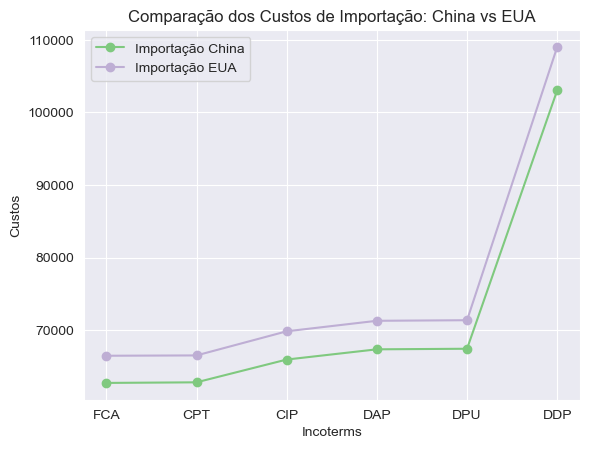

In [78]:
sns.set_palette('Accent')
sns.set_style('darkgrid')

custos.T.plot(kind='line', marker='o')
plt.title('Comparação dos Custos de Importação: China vs EUA')
plt.xlabel('Incoterms')
plt.ylabel('Custos')

plt.show()

## Parte III: Conclusão